### Part 1

Neural network with a single convolutional layer defined below as model

In [1]:
#Import necessary libraries
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib.style 
import matplotlib as mpl 

2024-02-01 15:39:19.370247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

#defining training and test images
training_images = training_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
testing_images = testing_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

Epoch 1/15
299/299 [==============================] - 6s 17ms/step - loss: 0.6081 - accuracy: 0.8439
Epoch 2/15
299/299 [==============================] - 5s 16ms/step - loss: 0.1814 - accuracy: 0.9457
Epoch 3/15
299/299 [==============================] - 4s 15ms/step - loss: 0.1336 - accuracy: 0.9594
Epoch 4/15
299/299 [==============================] - 4s 15ms/step - loss: 0.1103 - accuracy: 0.9666
Epoch 5/15
299/299 [==============================] - 5s 15ms/step - loss: 0.0947 - accuracy: 0.9716
Epoch 6/15
299/299 [==============================] - 5s 16ms/step - loss: 0.0825 - accuracy: 0.9750
Epoch 7/15
299/299 [==============================] - 4s 15ms/step - loss: 0.0738 - accuracy: 0.9776
Epoch 8/15
299/299 [==============================] - 5s 15ms/step - loss: 0.0663 - accuracy: 0.9798
Epoch 9/15
299/299 [==============================] - 5s 16ms/step - loss: 0.0610 - accuracy: 0.9811
Epoch 10/15
299/299 [==============================] - 5s 15ms/step - loss: 0.0562 - accura

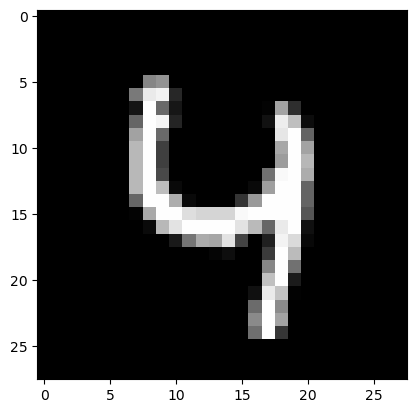

In [3]:
#defining model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(6, (4,4), activation='relu', input_shape=(28, 28,1 )))
model.add(keras.layers.MaxPooling2D((4, 4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(66, activation='relu'))
model.add(keras.layers.Dense(10))


#compiling model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#training model using training images and corresponding labels
history = model.fit(training_images, training_labels,batch_size=201, epochs=15)

#evaluate model and determining loss and accuracy
loss, accuracy = model.evaluate(testing_images, testing_labels)
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])



#random image selecter and resizing
random_index = np.random.randint(0, len(testing_images))
random_image = testing_images[random_index]
random_label = testing_labels[random_index]
random_image = np.expand_dims(random_image, axis=-1)
random_image = np.expand_dims(random_image, axis=0)



# Make a prediction using the trained model
predictions = prob_model.predict(random_image)

# Get the predicted label (index with the highest probability)
predicted_label = np.argmax(predictions)


# Display the image
plt.imshow(random_image.squeeze(), cmap='gray')

print("The predicted label is ", predicted_label)
print("The accuracy of this model is ", round(accuracy*100,2), "%")

model.summary()

Neural network with a two convolutional layers and a pooling layer defined below as model2

Epoch 1/15
600/600 [==============================] - 19s 29ms/step - loss: 0.3985 - accuracy: 0.8764
Epoch 2/15
600/600 [==============================] - 16s 27ms/step - loss: 0.1236 - accuracy: 0.9626
Epoch 3/15
600/600 [==============================] - 17s 28ms/step - loss: 0.0911 - accuracy: 0.9719
Epoch 4/15
600/600 [==============================] - 15s 25ms/step - loss: 0.0755 - accuracy: 0.9772
Epoch 5/15
600/600 [==============================] - 15s 25ms/step - loss: 0.0651 - accuracy: 0.9800
Epoch 6/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0564 - accuracy: 0.9826
Epoch 7/15
600/600 [==============================] - 17s 28ms/step - loss: 0.0510 - accuracy: 0.9836
Epoch 8/15
600/600 [==============================] - 17s 28ms/step - loss: 0.0464 - accuracy: 0.9857
Epoch 9/15
600/600 [==============================] - 17s 29ms/step - loss: 0.0425 - accuracy: 0.9872
Epoch 10/15
600/600 [==============================] - 17s 28ms/step - loss: 0.038

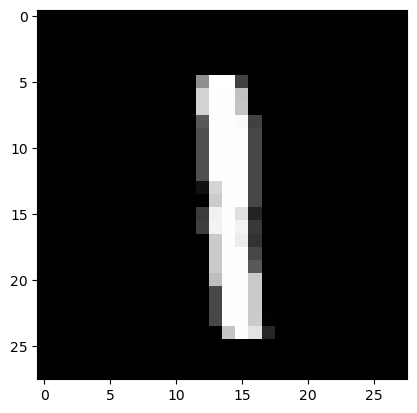

In [8]:
#model2 with 2 convolution layers and one pooling layer
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(6, (4,4), activation='relu', input_shape=(28, 28,1 )))
model2.add(keras.layers.Conv2D(6, (4,4), activation='relu'))
model2.add(keras.layers.Conv2D(6, (4,4), activation='relu'))

model2.add(keras.layers.MaxPooling2D((4, 4)))
#Flattening array and outputting 10 values
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(85, activation='relu'))
model2.add(keras.layers.Dense(10))

#compiling model
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#training model using training images and corresponding labels
history = model2.fit(training_images, training_labels,batch_size=100, epochs=15)

#evaluate model and determining loss and accuracy
loss2, accuracy2 = model2.evaluate(testing_images, testing_labels)


#random image selecter and resizing
random_index = np.random.randint(0, len(testing_images))
random_image = testing_images[random_index]
random_label = testing_labels[random_index]
random_image = np.expand_dims(random_image, axis=-1)
random_image = np.expand_dims(random_image, axis=0)


# Make a prediction using the trained model
prob_model2=tf.keras.Sequential([model2,tf.keras.layers.Softmax()])
predictions = prob_model2.predict(random_image)

# Get the predicted label (index with the highest probability)
predicted_label = np.argmax(predictions)

# Display the image
plt.imshow(random_image.squeeze(), cmap='gray')

print("The predicted label is ", predicted_label)
print("The accuracy of this model is ", round(accuracy2*100,2), "%", "The cost is ", round(loss2,2))

model2.summary()

### Part 2

Network with a bottleneck of 9 neurons

In [5]:
def circle_generator(batchsize, x, y):
    """
    Generate random circle images.

    Parameters:
    - batchsize: Number of images to generate.
    - x, y: Meshgrid coordinates.

    Returns:
    - circle_images: Batch of circle images.
    """
    R = np.random.uniform(size=batchsize)
    x0 = np.random.uniform(size=batchsize, low=-1, high=1)
    y0 = np.random.uniform(size=batchsize, low=-1, high=1)

    # Create binary circle images based on the generated parameters
    circle_images = 1.0 * ((x[None, :, :] - x0[:, None, None]) ** 2 + (y[None, :, :] - y0[:, None, None]) ** 2 < R[:, None, None] ** 2)

    return circle_images

def plot_test_image(model, image_generator, img_size):
    """
    Plot the input and output images for a random test image.

    Parameters:
    - model: Trained model for image prediction.
    - image_generator: Function to generate images.
    - img_size: Size of the images (assuming square images).
    """
    # Get a random test image
    y_test = get_test_image(image_generator, img_size)

    # Create the output image using the trained model
    y_test_out = model.predict_on_batch(y_test)

    # Plot the input and output images side by side
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(y_test[0, :, :], origin='lower')
    ax[0].set_title("Input")
    ax[1].imshow(y_test_out[0, :, :], origin='lower')
    ax[1].set_title("Output")


    
def get_test_image(image_generator, img_size):
    """
    Generate a test image using the provided image generator function.

    Parameters:
    - image_generator: Function to generate images.
    - img_size: Size of the images (assuming square images).

    Returns:
    - y_test: Test image array.
    """
    # Generate an array of the numbers 1 to img_size and create a meshgrid from them
    pixels = np.linspace(-1, 1, img_size)
    x, y = np.meshgrid(pixels, pixels)
        
    # Create a test image using 1 call to image_generator
    y_test = np.zeros([100, img_size, img_size, 1])
    y_test[:, :, :, 0] = image_generator(1, x, y)

    return y_test


In [6]:
# Now let's define a model to try and learn how to make these images
model3 = keras.Sequential()

# Flatten layer to transform the 27x27 input images into a 1D array
model3.add(keras.layers.Flatten(input_shape=(27, 27)))

# First hidden layer with 10 neurons and ReLU activation
model3.add(keras.layers.Dense(20, activation="relu"))

# Second hidden layer (bottleneck) with 9 neurons and ReLU activation
model3.add(keras.layers.Dense(9, activation="relu"))

# Third hidden layer with 10 neurons and ReLU activation
model3.add(keras.layers.Dense(20, activation="relu"))

# Dense layer with 27*27 neurons and ReLU activation
model3.add(keras.layers.Dense(27 * 27, activation='relu'))

# Reshape layer to transform the 1D array back to a 2D image (27x27)
model3.add(keras.layers.Reshape((27, 27)))

# Compile the model with mean squared error loss and the Adam optimizer
model3.compile(loss='mean_squared_error', optimizer='adam')

# Display the model summary
model3.summary()


def generate_and_train(model, image_generator, img_size, batchsize, steps):
    """
    Generate training data and train the provided model.

    Parameters:
    - model: The Keras model to be trained.
    - image_generator: Function to generate images for training.
    - img_size: Size of the images (assuming square images).
    - batchsize: Number of samples per batch.
    - steps: Number of training steps.

    Returns:
    - cost: Array containing costs during training.
    - y_target: Target data used for training.
    """
    # Generate an array of the numbers 1 to img_size and create a meshgrid from them
    pixels = np.linspace(-1, 1, img_size)
    x, y = np.meshgrid(pixels, pixels)

    # Create empty arrays for the input images, target images, and cost
    y_in = np.zeros([batchsize, img_size, img_size, 1])
    y_target = np.zeros([batchsize, img_size, img_size, 1])
    cost = np.zeros(steps)

    # Loop through the training steps
    for k in range(steps):
        # Produce samples using the provided image generator
        y_in[:, :, :, 0] = image_generator(batchsize, x, y)
        y_target = np.copy(y_in)  # Autoencoder wants to reproduce its input!

        # Perform one training step on this batch of samples
        cost[k] = model.train_on_batch(y_in, y_target)

    return cost, y_target

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 729)               0         
                                                                 
 dense_4 (Dense)             (None, 20)                14600     
                                                                 
 dense_5 (Dense)             (None, 9)                 189       
                                                                 
 dense_6 (Dense)             (None, 20)                200       
                                                                 
 dense_7 (Dense)             (None, 729)               15309     
                                                                 
 reshape (Reshape)           (None, 27, 27)            0         
                                                                 
Total params: 30298 (118.35 KB)
Trainable params: 3029

The cost is 0.055178407579660416


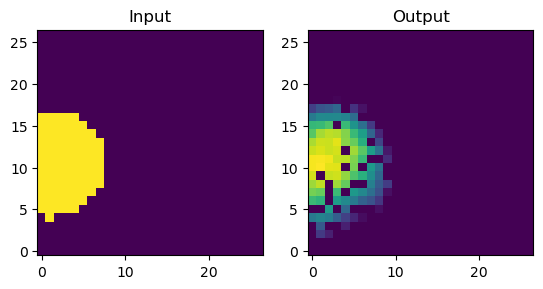

In [14]:
# Training parameters
img_size = 27  # Size of the images (assuming square images)
batch_size = 500  # Number of samples per batch
steps = 1000  # Number of training steps

# Train the model using the provided function
cost_3, y_target_3 = generate_and_train(model3, circle_generator, img_size, batch_size, steps)


# Print the final cost rounded to two decimal places
print("The cost is",cost_3[-1])

# Plot a test image generated by the trained model
plot_test_image(model3, circle_generator, 27)

Network with a bottleneck of 3 neurons

In [21]:

model4 = keras.Sequential()

# Flatten layer to transform the 27x27 input images into a 1D array
model4.add(keras.layers.Flatten(input_shape=(27, 27)))

# First hidden layer with 10 neurons and ReLU activation
model4.add(keras.layers.Dense(12, activation="relu"))
model4.add(keras.layers.Dense(12, activation="relu"))

# Second hidden layer (bottleneck) with 9 neurons and ReLU activation
model4.add(keras.layers.Dense(3, activation="relu"))

# Third hidden layer with 10 neurons and ReLU activation
model4.add(keras.layers.Dense(12, activation="relu"))

# Dense layer with 27*27 neurons and ReLU activation
model4.add(keras.layers.Dense(27 * 27, activation='relu'))

# Reshape layer to transform the 1D array back to a 2D image (27x27)
model4.add(keras.layers.Reshape((27, 27)))

# Compile the model with mean squared error loss and the Adam optimizer
model4.compile(loss='mean_squared_error', optimizer='adam')

# Display the model summary
model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 729)               0         
                                                                 
 dense_25 (Dense)            (None, 12)                8760      
                                                                 
 dense_26 (Dense)            (None, 12)                156       
                                                                 
 dense_27 (Dense)            (None, 3)                 39        
                                                                 
 dense_28 (Dense)            (None, 12)                48        
                                                                 
 dense_29 (Dense)            (None, 729)               9477      
                                                                 
 reshape_4 (Reshape)         (None, 27, 27)          

The cost is 0.05



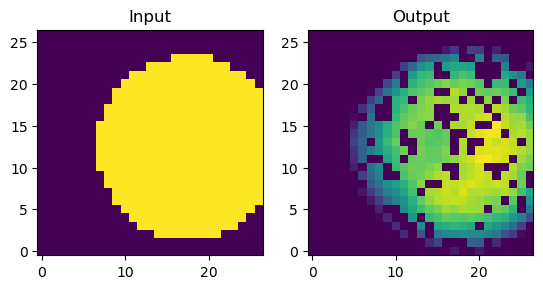

In [22]:
# Training parameters
img_size = 27  # Size of the images (assuming square images)
batch_size = 300  # Number of samples per batch
steps = 1000  # Number of training steps

# Train the model using the provided function
cost_4, y_target_4 = generate_and_train(model4, circle_generator, img_size, batch_size, steps)

# Print the final cost rounded to two decimal places
print("The cost is",round(cost_4[-1], 2))
print()

# Plot a test image generated by the trained model
plot_test_image(model3, circle_generator, 27)

My network choices reflect the relitivly high cost. The number parameters is very low and thus optimising this would result in a lower cost. The larger bottleneck performs slightly better and this is expected due to less loss of quality.



Bottlenecking in autoencoder models involves reducing the dimensionality of the input data to a lower-dimensional representation, a process observable at the bottleneck layer. The choice of bottleneck size plays a critical role in balancing model complexity and performance trade-offs.

Opting for higher bottleneck sizes enables the model to capture intricate features and details from the input data, resulting in a higher-dimensional representation that facilitates better reconstruction of the original input. This leads to lower reconstruction error and enhanced resolution in reconstructed images. However, larger bottleneck sizes increase model complexity and the number of trainable parameters, translating to longer training times, elevated risk of overfitting, and higher computational resource demands.

In our study, we evaluated performance in terms of loss, with a lower loss indicating better replication of the original data by the autoencoder function when employing a higher bottleneck value.

Conversely, choosing lower bottleneck levels yields a more condensed and straightforward encoding of the input data by diminishing the dimensionality of the input representation. While smaller bottleneck sizes may expedite training and result in less complex models, they may also introduce information loss and compromise reconstruction quality by failing to capture crucial aspects of the input data. Moreover, bottlenecking at lower levels may impede the model's ability to accurately represent intricate patterns and structures in the data.

In conclusion, there exists a trade-off between model complexity and performance when determining the bottleneck size. Lower bottleneck sizes offer simplicity and efficiency but may sacrifice reconstruction accuracy and information retention. On the other hand, higher bottleneck sizes deliver superior reconstruction quality at the expense of increased complexity. Experimentation is often necessary to strike the right balance, considering the specific requirements of the task, computational limitations, and performance considerations in order to identify the optimal bottleneck size.




